# Data setup 

## Import necessary packages

In [2]:
import texttable as tt
import matplotlib.pyplot as plt

import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing

from scipy.interpolate import interp1d
from scipy import interpolate
import itertools


## Initialize data from files

In [17]:
def data_from_file(file_name):
 
    data = np.loadtxt(file_name, delimiter=',')
    alfa = list(range(0,31))
    I_currents = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6]
    xLabel = " I [A]"
    yLabel = "Flux"
    return alfa, np.transpose(data), I_currents, xLabel, yLabel
    
alfa, Flux, I_currents, xLabel, yLabel = data_from_file('SRM_input_data.txt')

print('alfa', alfa)
print('currents', I_currents)
print('flux', Flux.shape)

alfa [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
currents [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
flux (31, 13)


# [REDUCE CURRENTS] Represent original curves for different angles values

(31, 13)


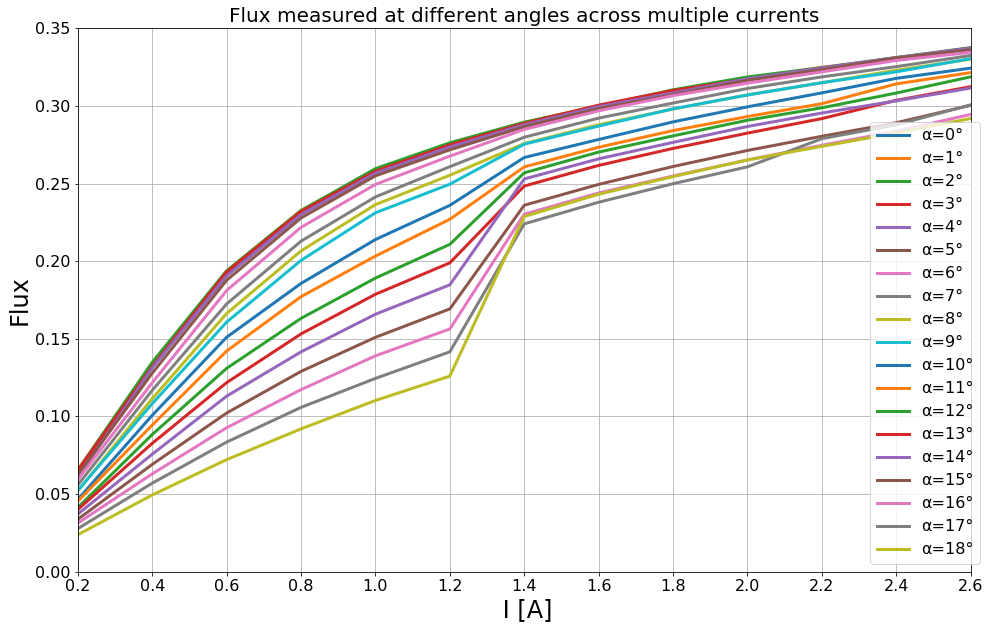

In [4]:

flux = np.copy(Flux)
print(flux.shape)



plt.figure(figsize=[16,10])

curves_to_plot = list(range(19))

for idx in curves_to_plot:
    df =flux[idx, :]
    plt.plot(I_currents, df, linewidth=3, label='α=%d°' %(idx))
#     plt.scatter(I_currents,df, linewidths=4)
    plt.ylim([0,0.35])
    plt.xlim([0.2, 2.6])
    plt.xticks(I_currents, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xLabel, fontsize = 24)
    plt.ylabel(yLabel, fontsize = 24)
    
  
    plt.title('Flux measured at different angles across multiple currents', fontsize=20)
    plt.legend(bbox_to_anchor=(1.02, 0), loc='lower right', ncol=1, fontsize=16)
plt.grid()
plt.show()

# [REDUCE CURRENTS]
## Use PCA to reduce the number of Ox points (Currents)

- observed variable: Flux Linkage at a specific Current Intensity

- sample: given an angle, measure flux value for different Currents; we are oblivious of the Angle under which the measurement was made; 
- this descripition indicates only how all the samples were collected

- X.shape: (angles, currents)

- what we want: determine Currents with highest variance (this what PCA does) across all Angles



# [REDUCE CURRENTS] 
## Plot reconstruction error of PCA as a function of different number of components

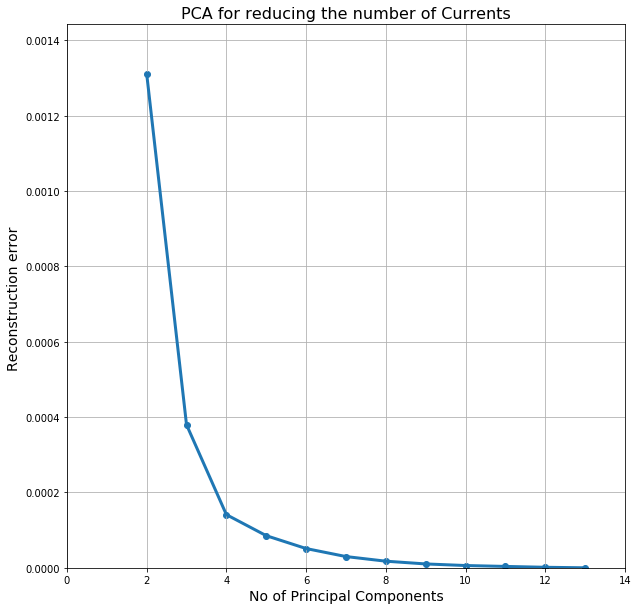

In [5]:
#preprocess the data
X = np.copy(Flux)
# print(X.shape)
scaler = preprocessing.StandardScaler()
df_flux_scaled = scaler.fit_transform(X)
no_of_comps = range(2, 14)

errors = []
for comp in no_of_comps:
    pca_reduce_points = PCA(n_components=comp)
    flux_reduced = pca_reduce_points.fit_transform(df_flux_scaled)
    projected  = pca_reduce_points.inverse_transform(flux_reduced)
    projected_unscaled = scaler.inverse_transform(projected)
    errors.append(np.sum((projected_unscaled - X) ** 2))
# print('components shape: ', pca_reduce_points.components_.shape)

plt.figure(figsize=(10, 10))
plt.xlabel('No of Principal Components', fontsize = 14)
plt.ylabel('Reconstruction error ', fontsize = 14)
plt.xlim([0,14])
plt.ylim([0.1*min(errors), 1.1*max(errors)])
plt.locator_params(axis='x', nbins=len(no_of_comps))
plt.scatter(no_of_comps, errors)
plt.plot(no_of_comps, errors, linewidth=3)
plt.grid()
plt.title('PCA for reducing the number of Currents', fontsize=16)
plt.show()



# [REDUCE CURRENTS] 
## Find the Currents with highest variance and select the first n ones

In [6]:
X = np.copy(Flux)
variance = np.var(X, axis=0)

currents_variance = sorted(zip(I_currents, variance), key=lambda e : e[1], reverse=True)
border_currents = [e for e in currents_variance if e[0] == min(I_currents)] + [e for e in currents_variance if e[0] == max(I_currents)]
non_border_currents = [e for e in currents_variance if e not in border_currents]

def get_top_currents(currents_no):
    assert(currents_no >= 2)
    top_currents = border_currents + non_border_currents[:currents_no-2]
    return sorted([e[0] for e in top_currents])

top_n = range(2, len(I_currents))

print('Currents with highest variance')
for n in top_n:
    top_n_curents = get_top_currents(n)
    print('top %2d Currents' % n, top_n_curents)


Currents with highest variance
top  2 Currents [0.2, 2.6]
top  3 Currents [0.2, 1.2, 2.6]
top  4 Currents [0.2, 1.0, 1.2, 2.6]
top  5 Currents [0.2, 0.8, 1.0, 1.2, 2.6]
top  6 Currents [0.2, 0.8, 1.0, 1.2, 1.6, 2.6]
top  7 Currents [0.2, 0.8, 1.0, 1.2, 1.4, 1.6, 2.6]
top  8 Currents [0.2, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.6]
top  9 Currents [0.2, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.6]
top 10 Currents [0.2, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.6]
top 11 Currents [0.2, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
top 12 Currents [0.2, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]


# [REDUCE CURRENTS] 

- We measure the Flux Linkage value in key top n Curents and then use linear interpolation to predict flux across all Currents 
- We use Linear Interpoltion, as the shape of the graphical representation for the Currents Curves contains steps.
- plot Interpolation error as a function of the number of points used as basis per each curve
- we expect to get the same shape like in PCA reconstruction (first plot)

COMPARE INTERPOLATION WITH DIFFERENT NUMBER of basis Points


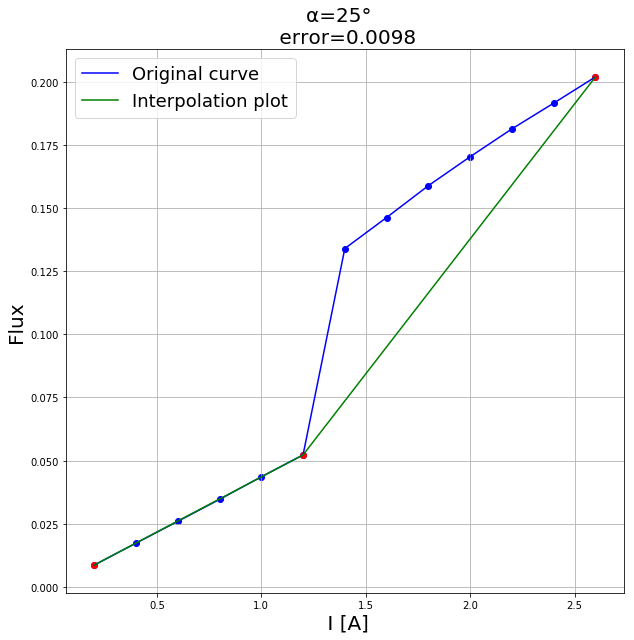

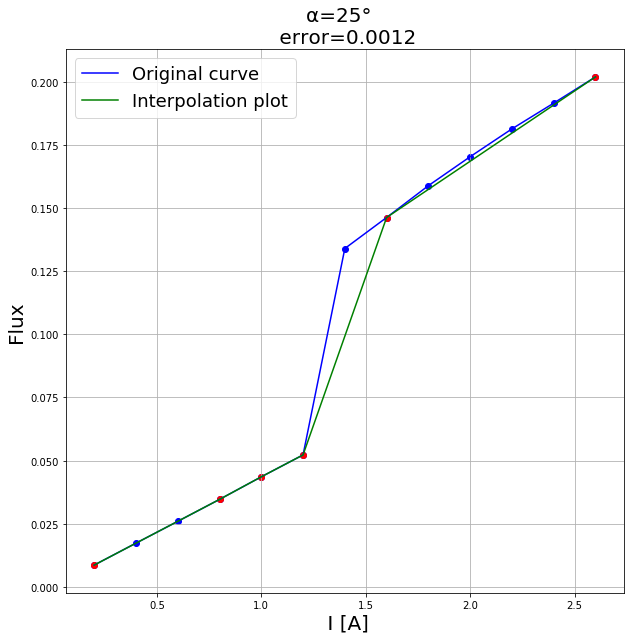

In [18]:

X = np.copy(Flux)
# print(X.shape)


def get_index(vec, e):
    for i in range(len(vec)):
        if e == vec[i]:
            return i
    assert(False)

def compare_curve_with_interp(curve, n, top_n_function, title):
    top_n_curents = top_n_function(n)
    top_n_curents_indices = [get_index(I_currents, c) for c in top_n_curents]
    plt.figure(figsize=(10, 10))
    x = I_currents 
    baseline = X[curve, :] 
    plt.plot(x, baseline, c='b', label = 'Original curve')
    plt.scatter(x, baseline, c='b')
    x_ = top_n_curents
    y_ = X[curve, top_n_curents_indices]
    tck_ = interpolate.splrep(x_, y_, k=1)
    y = interpolate.splev(x, tck_) 
    error = np.sum((y - baseline)**2)
    

    plt.scatter(x_, y_, c='r')
    plt.plot(x, y, c='g', label = 'Interpolation plot')
    plt.title('%s \n error=%.4f' % (title, error), fontsize=20)
    plt.xlabel(xLabel, fontsize = 20)
    plt.ylabel(yLabel, fontsize = 20)
    plt.legend(loc='best', fontsize = 18)
    plt.grid()
    plt.show()
    

print('COMPARE INTERPOLATION WITH DIFFERENT NUMBER of basis Points')


n = 3
curve = 25
compare_curve_with_interp(curve, n, get_top_currents, 
                'α=%d° ' % (curve))
# n = 5
# curve = 25
# compare_curve_with_interp(curve, n, get_top_currents, 
#                 'α=%d° ' % (curve))
n = 6
curve = 25
compare_curve_with_interp(curve, n, get_top_currents, 
                'α=%d° ' % (curve))
# n = 9
# curve = 25
# compare_curve_with_interp(curve, n, get_top_currents, 
#                 'α=%d°' % (curve))


# [REDUCE CURRENTS] Plot reconstruction Error of Interpolation

(31, 13)


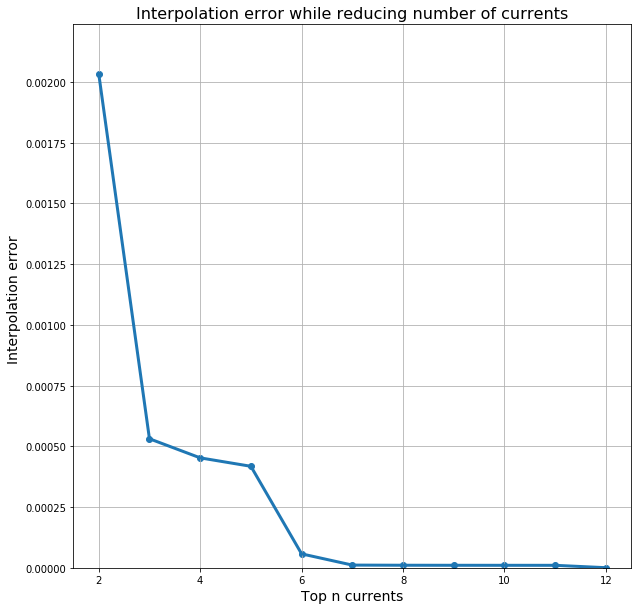

In [8]:
X = np.copy(Flux)
print(X.shape)

top_n = range(2, len(I_currents))
errors = []
for n in top_n:
    top_n_curents = get_top_currents(n)
    top_n_curents_indices = [get_index(I_currents, c) for c in top_n_curents]
    error = 0
    for curve in range(X.shape[0]):
        # baseline = y values obtained when interpolating with all ground truth points
        x = I_currents 
        baseline = X[curve, :] 

        # interpolate with top_n_currents as basis 
        x_ = top_n_curents
        y_ = X[curve, top_n_curents_indices]
        tck_ = interpolate.splrep(x_, y_, k=1)
        y = interpolate.splev(x, tck_) 
        
        # error -- difference between baseline interp curve and current one
        error += np.sum((baseline - y)**2) /  baseline.shape[0]
    errors.append(error / X.shape[0])
            
plt.figure(figsize=(10, 10))
plt.xlabel('Top n currents', fontsize = 14)
plt.ylabel('Interpolation error ', fontsize = 14)
plt.ylim([0.1*min(errors), 1.1*max(errors)])
plt.locator_params(axis='x', nbins=len(top_n))
plt.scatter(top_n, errors)
plt.plot(top_n, errors, linewidth=3)
plt.grid()
plt.title('Interpolation error while reducing number of currents', fontsize=16)
plt.show()


# [REDUCE ANGLES] 
## Reducing the number of Curves (Angles)

- observed variable: Flux Linkage at a specific Angle value

- sample: given a Current, measure flux value for different Angles


# [REDUCE ANGLES] Represent original curves 

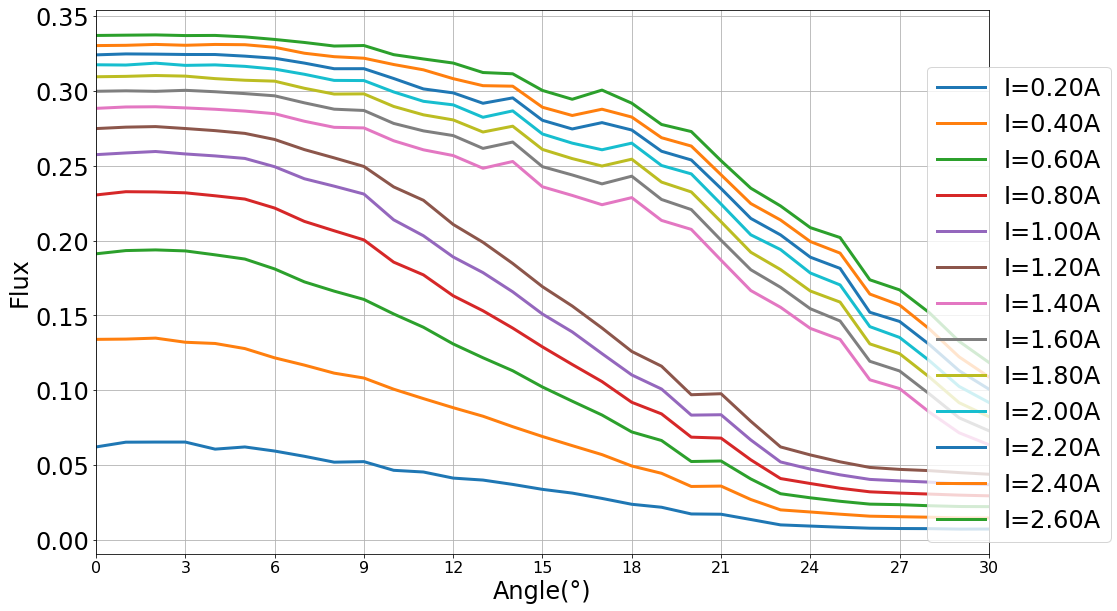

In [9]:

flux = np.transpose(np.copy(Flux))
# print(flux.shape)

plt.figure(figsize=[16,10])

curves_to_plot = list(range(13))#[1,5,7,12]
for idx  in curves_to_plot:
    df =flux[idx, :]
    plt.plot(alfa, df, linewidth=3, label='I=%0.2fA' %(I_currents[idx]))
#     plt.scatter(alfa, df, linewidths=4)
    plt.xlim([0,30])
    plt.xticks(alfa, fontsize=16)
    plt.yticks(fontsize=24)
    plt.xlabel("Angle(°)", fontsize = 24)
    plt.locator_params(axis='x', nbins=len(I_currents))



    plt.ylabel(yLabel, fontsize =24)
#     plt.title('Flux measured at different currents across multiple angles', fontsize=24)
    plt.legend( bbox_to_anchor=(1.15, 0), loc='lower right', ncol=1,fontsize=24)
plt.grid()
plt.show()

# [REDUCE ANGLES]
## Use PCA to reduce the number of OY measurements (Angles)

- observed variable: flux at a specific angle 

- sample: given a current, measure flux value at different angles; we are oblivious of the current under which the measurement was made; this descripition indicates only how all the samples were collected

- X.shape: (currents, angles)

- what we want: determine angles with highest variance (this what PCA does) across all currents



# [REDUCE ANGLES]
## Plot reconstruction error of PCA as a function of different number of components

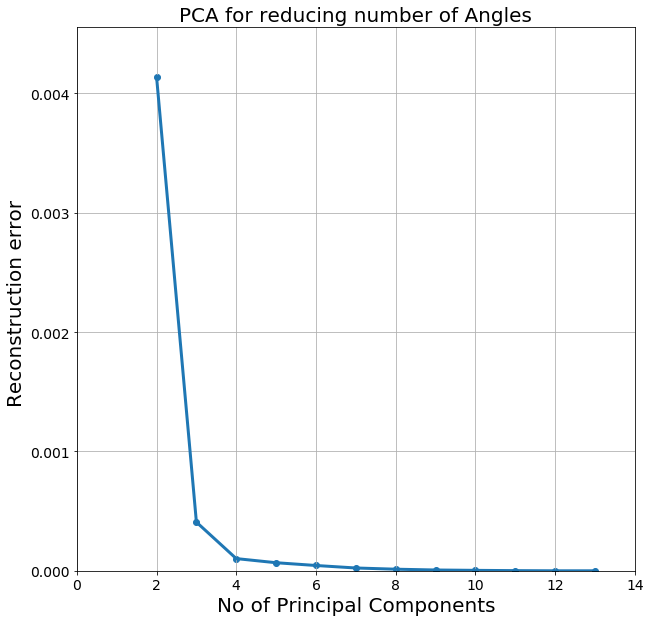

In [10]:
#preprocess the data
X = np.transpose(np.copy(Flux))
scaler = preprocessing.StandardScaler()
df_flux_scaled = scaler.fit_transform(X)

no_of_comps = range(2, 14)

errors = []
for comp in no_of_comps:
    pca_reduce_points = PCA(n_components=comp)
    flux_reduced = pca_reduce_points.fit_transform(df_flux_scaled)
    projected  = pca_reduce_points.inverse_transform(flux_reduced)
    projected_unscaled = scaler.inverse_transform(projected)
    errors.append(np.sum((projected_unscaled - X) ** 2))
# print('components shape', pca_reduce_points.components_.shape)

plt.figure(figsize=(10, 10))
plt.xlabel('No of Principal Components', fontsize = 20)
plt.ylabel('Reconstruction error ', fontsize = 20)
plt.xlim([0,14])
plt.ylim([0.1*min(errors), 1.1*max(errors)])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.locator_params(axis='x', nbins=len(no_of_comps))
plt.scatter(no_of_comps, errors)
plt.plot(no_of_comps, errors, linewidth=3)
plt.grid()
plt.title('PCA for reducing number of Angles', fontsize=20)
plt.show()


# [REDUCE ANGLES] 
## Find Angles with highest variance and select the first n

In [11]:
X = np.transpose(np.copy(Flux))
variance = np.var(X, axis=0)

angles_variance = sorted(zip(alfa, variance), key=lambda e : e[1], reverse=True)
border_angles = [e for e in angles_variance if e[0] == min(alfa)] + [e for e in angles_variance if e[0] == max(alfa)]
non_border_angles = [e for e in angles_variance if e not in border_angles]

def get_top_angles(angles_no):
    assert(angles_no >= 2)
    top_angles = border_angles + non_border_angles[:angles_no-2]
    return sorted([e[0] for e in top_angles])

top_n = range(2, 10)

print('Angles with highest variance')
for n in top_n:
    top_n_angles = get_top_angles(n)
    print('top %2d angles' % n, top_n_angles)


Angles with highest variance
top  2 angles [0, 30]
top  3 angles [0, 18, 30]
top  4 angles [0, 18, 20, 30]
top  5 angles [0, 17, 18, 20, 30]
top  6 angles [0, 17, 18, 19, 20, 30]
top  7 angles [0, 14, 17, 18, 19, 20, 30]
top  8 angles [0, 14, 16, 17, 18, 19, 20, 30]
top  9 angles [0, 14, 15, 16, 17, 18, 19, 20, 30]


# [REDUCE ANGLES] 
 - We measure the flux value in key top n Angles and then use linear interpolation to predict flux across all Angles 
- plot Interpolation error is a function of the number of points used as basis per each curve
- we expect to get the same shape like in PCA reconstruction (first plot)

Compare Interpolation with Different number of Basis Points


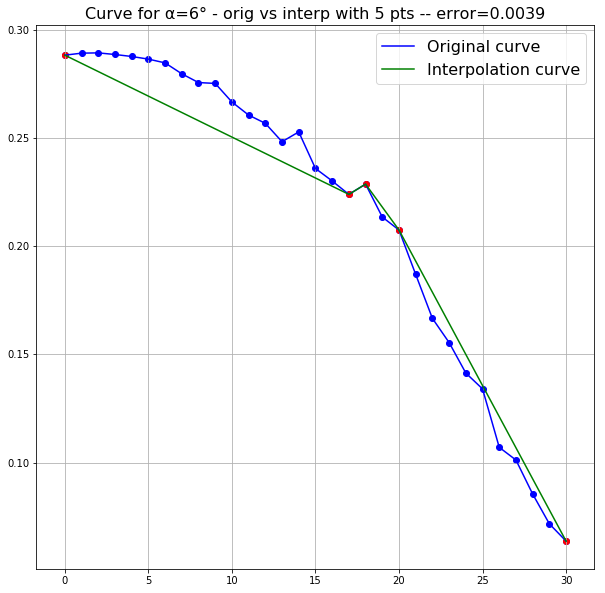

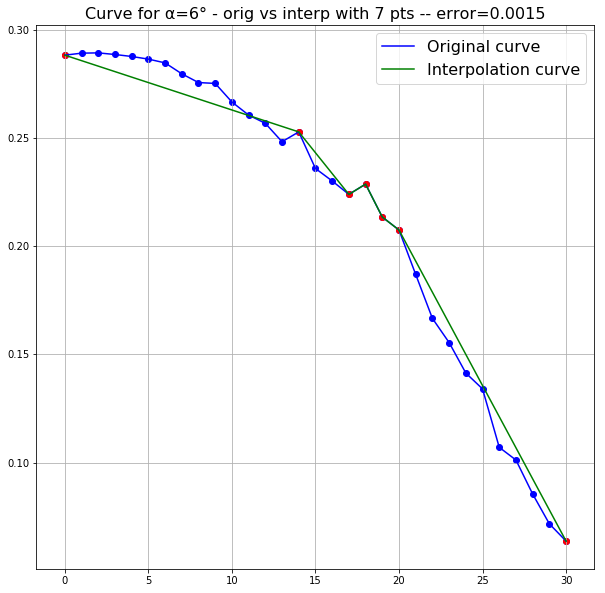

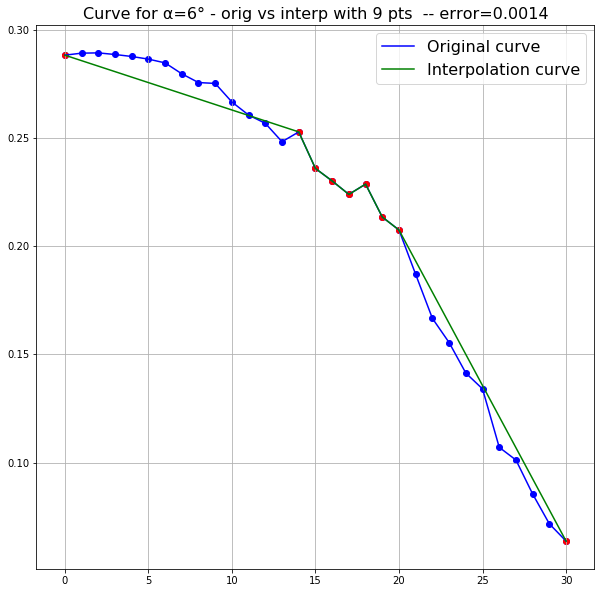

In [13]:
X = np.transpose(np.copy(Flux))
# print(X.shape)

def get_index(vec, e):
    for i in range(len(vec)):
        if e == vec[i]:
            return i
    assert(False)

def compare_curve_with_interp(curve, n, top_n_function,title):
    top_n_angles = top_n_function(n)
    top_n_angles_indices = [get_index(alfa, c) for c in  top_n_angles]
    plt.figure(figsize=(10, 10))
    x = alfa 
    baseline = X[curve, :] 
    plt.plot(x, baseline, c='b', label = 'Original curve')
    plt.scatter(x, baseline, c='b')
    x_ = top_n_angles
    y_ = X[curve, top_n_angles_indices]
    tck_ = interpolate.splrep(x_, y_, k=1)
    y = interpolate.splev(x, tck_) 
    error = np.sum((y - baseline)**2)
    
       
    plt.scatter(x_, y_, c='r')
    plt.grid()
    plt.plot(x, y, c='g', label = 'Interpolation curve')
    plt.title('%s -- error=%.4f' % (title, error), fontsize=16)
    plt.legend(loc='best', fontsize = 16)
    plt.show()

print('Compare Interpolation with Different number of Basis Points')

n = 5
curve = 6
compare_curve_with_interp(curve, n,get_top_angles,'Curve for α=%d° - orig vs interp with %d pts' % (curve, n))
n = 7
compare_curve_with_interp(curve, n, get_top_angles,'Curve for α=%d° - orig vs interp with %d pts'  % (curve, n))
n = 9
compare_curve_with_interp(curve, n, get_top_angles,'Curve for α=%d° - orig vs interp with %d pts ' % (curve, n))


# [REDUCE ANGLES] Plot reconstruction Error of Interpolation

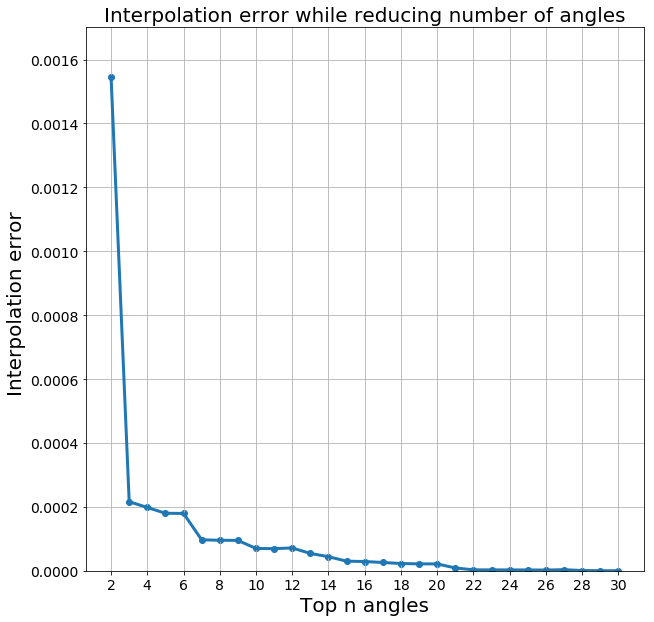

In [14]:
X = np.transpose(np.copy(Flux))
# print(X.shape)

top_n = range(2, len(alfa))
errors = []
for n in top_n:
    top_n_angles = get_top_angles(n)
    top_n_angles_indices = [get_index(alfa, c) for c in top_n_angles]
    error = 0
    for curve in range(X.shape[0]):
        # baseline = y values obtained when interpolating with all ground truth points
        x = alfa 
        baseline = X[curve, :] 

        # interpolate with top_n_currents as basis 
        x_ = top_n_angles
        y_ = X[curve, top_n_angles_indices]
        tck_ = interpolate.splrep(x_, y_, k=1)
        y = interpolate.splev(x, tck_) 
        
        # error -- difference between baseline interp curve and current one
        error += np.sum((baseline - y)**2) /  baseline.shape[0]
    errors.append(error / X.shape[0])
            
plt.figure(figsize=(10, 10))
plt.xlabel('Top n angles', fontsize = 20)
plt.ylabel('Interpolation error ', fontsize = 20)
plt.ylim([0.1*min(errors), 1.1*max(errors)])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.locator_params(axis='x', nbins=len(top_n))
plt.scatter(top_n, errors)
plt.plot(top_n, errors, linewidth=3)
plt.grid()
plt.title('Interpolation error while reducing number of angles', fontsize=20)
plt.show()